## Attrition Study - Zup

In [1]:
# Environment Setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries Options
pd.set_option('max_columns', 100)
%matplotlib inline

In [563]:
# Reading Data
df = pd.read_excel('../data/HR.xlsx')

In [564]:
# First impressions
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [565]:
# Dataset Shape
df.shape

(1470, 35)

In [566]:
# Data info and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [567]:
# Checking for missing data
df.isna().sum()/len(df)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [568]:
# Data distribution
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [569]:
# Is that a balanced dataset?

attrition_percentage = df.groupby('Attrition')[['EmployeeCount']].count().copy()/len(df)
attrition_percentage.reset_index(inplace=True)
attrition_percentage.sort_values('EmployeeCount', ascending=True, inplace=True)

attrition_percentage['EmployeeCount'] = attrition_percentage['EmployeeCount'].round(2)*100
attrition_percentage['EmployeeCount'] = attrition_percentage['EmployeeCount'].astype('str')
attrition_percentage['EmployeeCount'] = attrition_percentage['EmployeeCount'].str[:2] + '%'

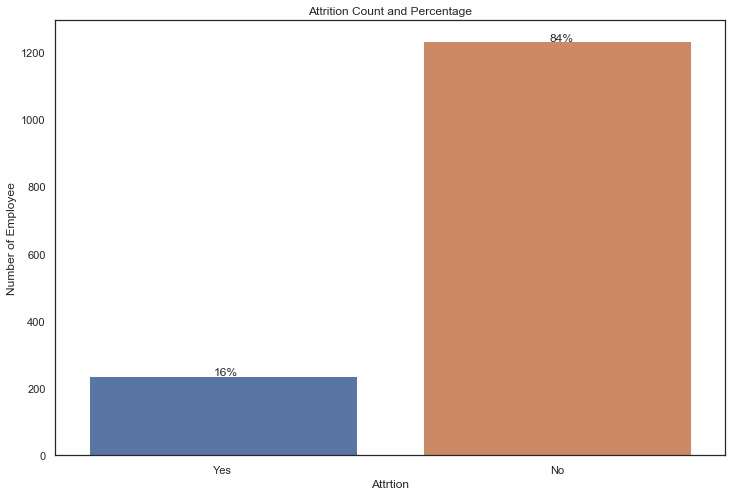

In [570]:
f, ax = plt.subplots(figsize=(12,8))
_ = sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count and Percentage')
plt.ylabel('Number of Employee')
plt.xlabel('Attrtion')

for p, label in zip(ax.patches, attrition_percentage['EmployeeCount'].value_counts().index):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

In [884]:
#No, maybe will be necessary to take care about it at model tranning

In [571]:
# Transforming Data
df['Department'].replace('Sales', 'Sales', inplace=True)
df['Department'].replace('Research & Development', 'R&D', inplace=True)
df['Department'].replace('Human Resources', 'HR', inplace=True)

df = pd.concat([df, pd.get_dummies(df['Department'])], axis=1)

df['Attrition'].replace('Yes', 1, inplace=True)
df['Attrition'].replace('No', 0, inplace=True)

df['OverTime'].replace('Yes', 1, inplace=True)
df['OverTime'].replace('No', 0, inplace=True)

In [572]:
# Getting all numerical columns
numerical_columns = df._get_numeric_data().columns.to_list()

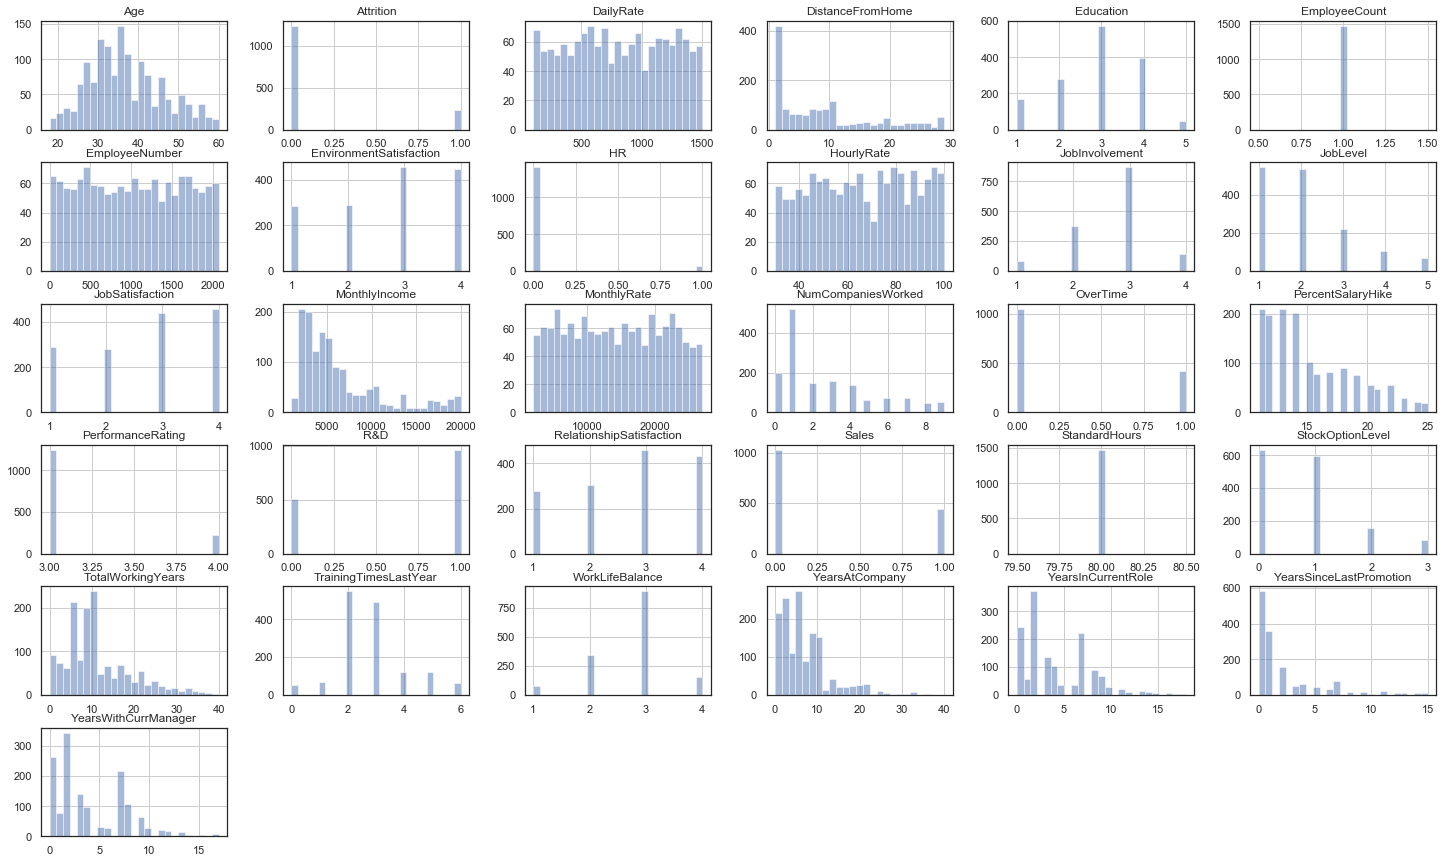

In [573]:
# Numerical variables distribution overview
_ = df[numerical_columns].hist(bins=25, alpha=0.5, figsize=(25,15))

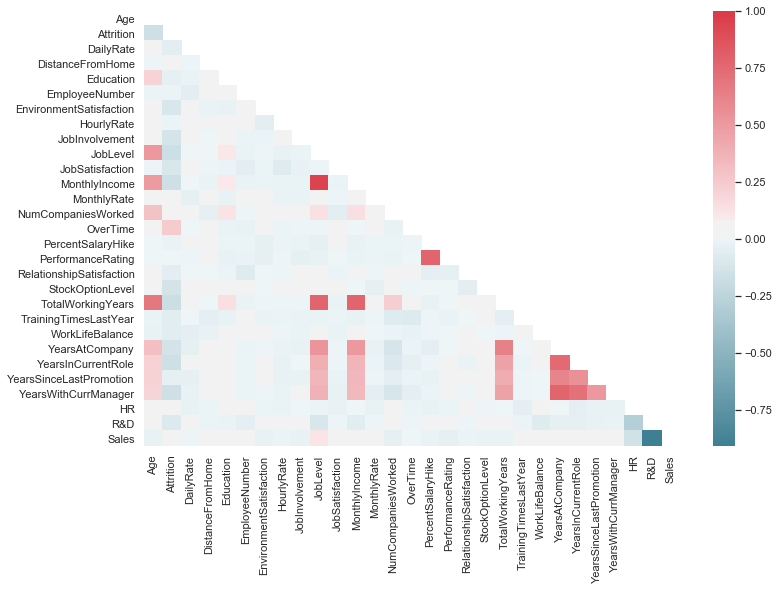

In [574]:
# Correlation between variables

sns.set(style="white")

corr = df.corr()
corr.drop(['EmployeeCount', 'StandardHours'], axis=0, inplace=True)
corr.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

In [576]:
# Attrition Correlation with all values (sorted)
corr[['Attrition']].sort_values('Attrition', ascending=False)#.to_clipboard()

,Attrition
Attrition,1.000000
OverTime,0.246118
Sales,0.080855
DistanceFromHome,0.077924
NumCompaniesWorked,0.043494
HR,0.016832
MonthlyRate,0.015170
PerformanceRating,0.002889
HourlyRate,-0.006846
EmployeeNumber,-0.010577


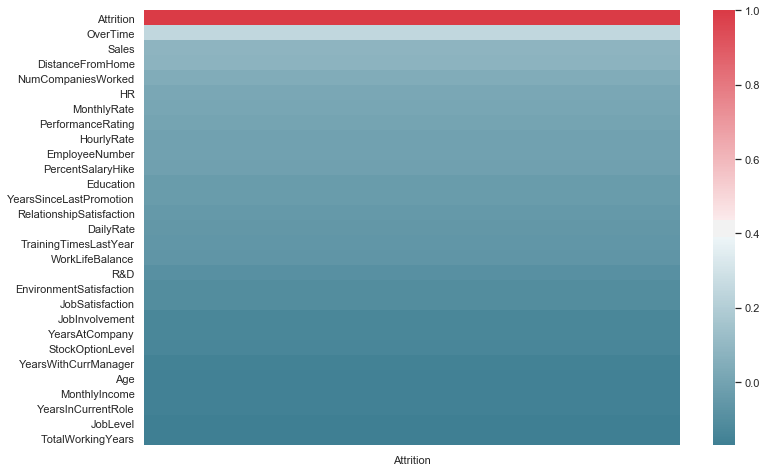

In [99]:
# Plotting only Attrition corr
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = corr[['Attrition']].sort_values('Attrition', ascending=False)

f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, cmap=cmap)

In [100]:
# Let's analyse the most correlated features

### OverTime

In [101]:
df['OverTime'].value_counts()/len(df)

0    0.717007
1    0.282993
Name: OverTime, dtype: float64

In [594]:
overtime_attrition = df.groupby(['Attrition', 'OverTime'])[['EmployeeCount']].count().copy()
overtime_attrition.reset_index(inplace=True)

In [595]:
attrtion_abs = df.groupby('Attrition')[['EmployeeCount']].count().copy()
attrtion_abs.reset_index(inplace=True)

In [599]:
overtime_attrition_percentage = pd.merge(overtime_attrition, attrtion_abs, on='Attrition', how='left', suffixes=('_OverTime', '_Attrition'))

In [601]:
overtime_attrition_percentage['Ratio'] = overtime_attrition_percentage['EmployeeCount_OverTime']/overtime_attrition_percentage['EmployeeCount_Attrition']

In [603]:
overtime_attrition_percentage
overtime_attrition_percentage['Ratio'] = overtime_attrition_percentage['Ratio'].round(2)*100
overtime_attrition_percentage['Ratio'] = overtime_attrition_percentage['Ratio'].astype('str')
overtime_attrition_percentage['Ratio'] = overtime_attrition_percentage['Ratio'].str[:2]+'%'

In [610]:
overtime_attrition_percentage = overtime_attrition_percentage[overtime_attrition_percentage['OverTime'] == 1]

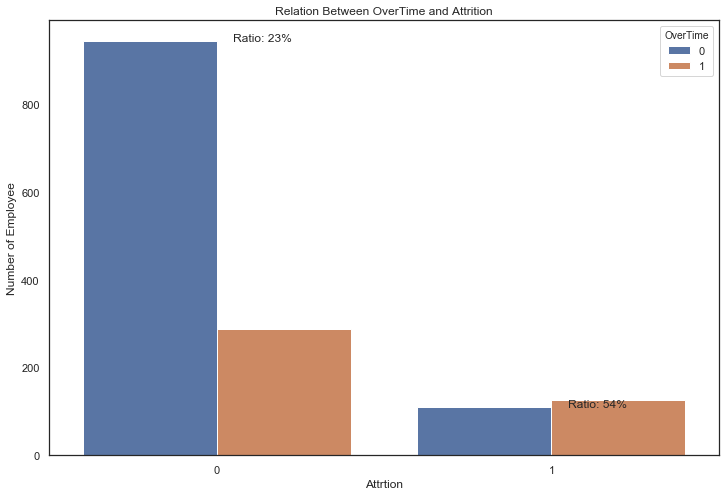

In [612]:
f, ax = plt.subplots(figsize=(12,8))
_ = sns.countplot(x='Attrition', hue='OverTime', data=df)
plt.title('Relation Between OverTime and Attrition')
plt.ylabel('Number of Employee')
plt.xlabel('Attrtion')


for p, label in zip(ax.patches, overtime_attrition_percentage['Ratio'].value_counts().index):
    ax.annotate('Ratio: ' + label, (p.get_x()+0.45, p.get_height()+0.3))

In [ ]:
f, ax = plt.subplots(3, 3, figsize=(15,15))

_ = sns.countplot(x='OverTime', hue='Attrition', data=df[df['JobRole'] == 'Sales Executive'], ax=ax[0,0])
_ = sns.countplot(x='OverTime', hue='Attrition', data=df[df['JobRole'] == 'Research Scientist'], ax=ax[0,1])
_ = sns.countplot(x='OverTime', hue='Attrition', data=df[df['JobRole'] == 'Laboratory Technician'], ax=ax[0,2])

In [201]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

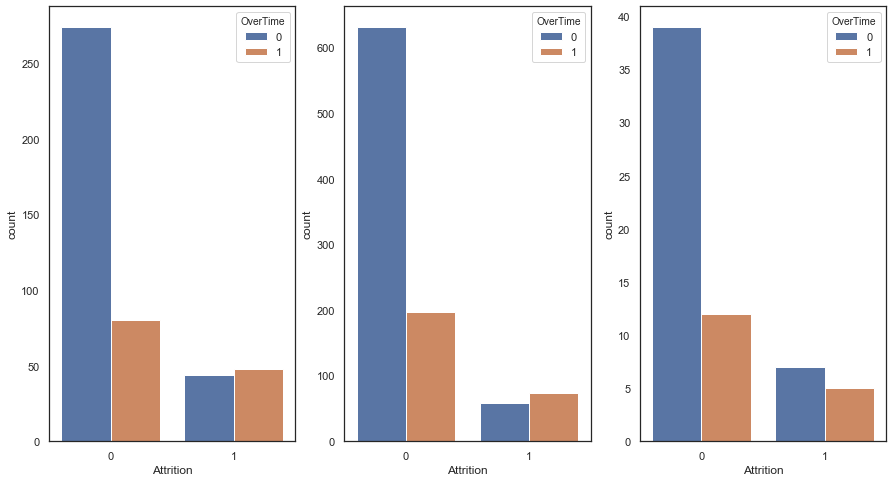

In [614]:
f, ax = plt.subplots(1, 3, figsize=(15,8))

_ = sns.countplot(x='Attrition', hue='OverTime', data=df[df['Department'] == 'Sales'], ax=ax[0])
_ = sns.countplot(x='Attrition', hue='OverTime', data=df[df['Department'] == 'R&D'], ax=ax[1])
_ = sns.countplot(x='Attrition', hue='OverTime', data=df[df['Department'] == 'HR'], ax=ax[2])


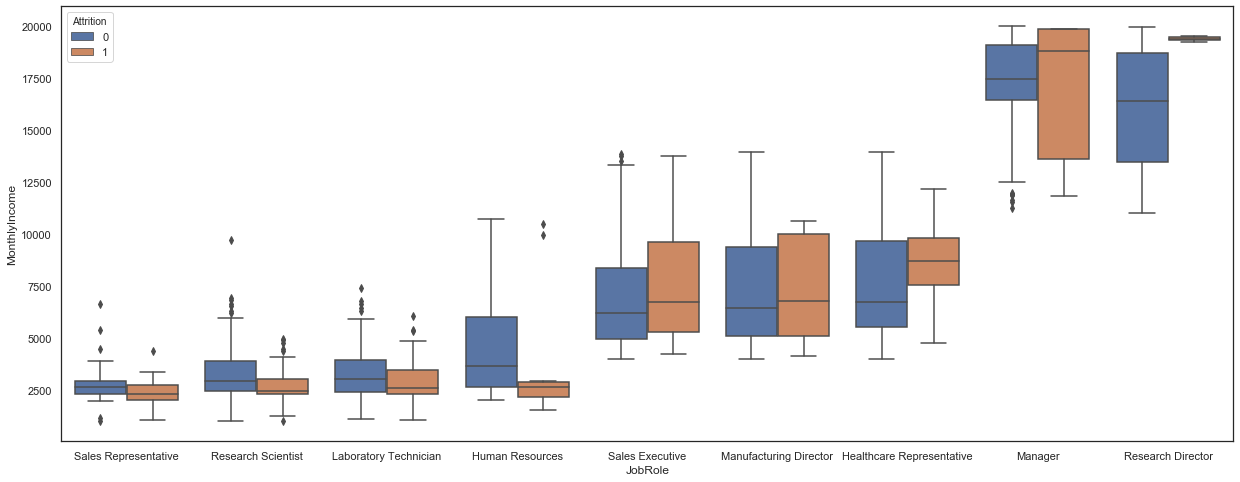

In [228]:
f, ax = plt.subplots(figsize=(21,8))
_ = sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, order=['Sales Representative', 'Research Scientist', 'Laboratory Technician', 'Human Resources', 'Sales Executive',
                                                                                  'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Research Director'])

In [ ]:
# Let's slip the roles in 3, mesure by income (low, Medium, High)

In [282]:
df[df['JobRole'] == 'Sales Representative']['OverTime'].value_counts()

0    59
1    24
Name: OverTime, dtype: int64

In [298]:
jobrole_total_attrition = df.groupby(['JobRole', 'Attrition'])[['EmployeeCount']].count()
jobrole_total_attrition.reset_index(inplace=True)

jobrole_overtime_attrition = df.groupby(['JobRole', 'Attrition', 'OverTime'])[['EmployeeCount']].count()
jobrole_overtime_attrition.reset_index(inplace=True)

jobrole_overtime_percent = pd.merge(jobrole_overtime_attrition, jobrole_total_attrition, on=['JobRole', 'Attrition'], how='left', suffixes=('_overtime', '_total'))

In [302]:
jobrole_overtime_percent['Ratio'] = jobrole_overtime_percent['EmployeeCount_overtime']/jobrole_overtime_percent['EmployeeCount_total']

In [307]:
attrtion_with_overtime_percentage = jobrole_overtime_percent[(jobrole_overtime_percent['Attrition'] == 1) & (jobrole_overtime_percent['OverTime'] == 1)].copy()

In [312]:
attrtion_with_overtime_percentage.reset_index(inplace=True, drop=True)

In [313]:
attrtion_with_overtime_percentage

,JobRole,Attrition,OverTime,EmployeeCount_overtime,EmployeeCount_total,Ratio
0,Healthcare Representative,1,1,2,9,0.222222
1,Human Resources,1,1,5,12,0.416667
2,Laboratory Technician,1,1,31,62,0.500000
3,Manager,1,1,4,5,0.800000
4,Manufacturing Director,1,1,4,10,0.400000
5,Research Director,1,1,1,2,0.500000
6,Research Scientist,1,1,33,47,0.702128
7,Sales Executive,1,1,31,57,0.543860
8,Sales Representative,1,1,16,33,0.484848


In [658]:
#attrition_per_department
df.groupby(['Department','Attrition'])[['EmployeeCount']].count().to_clipboard()

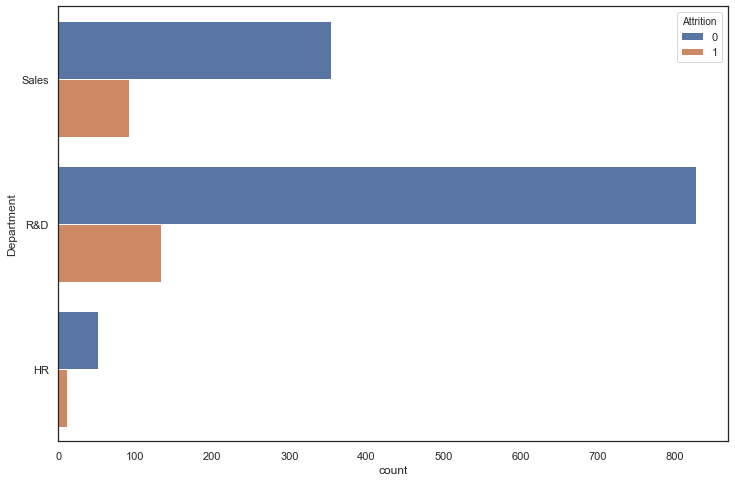

In [653]:
f, ax  = plt.subplots(figsize=(12,8))
_ = sns.countplot(y='Department', data=df, hue='Attrition')

In [664]:
df.groupby(['Department', 'EducationField', 'Attrition'])[['EmployeeCount']].count().to_clipboard()

#### INCOME

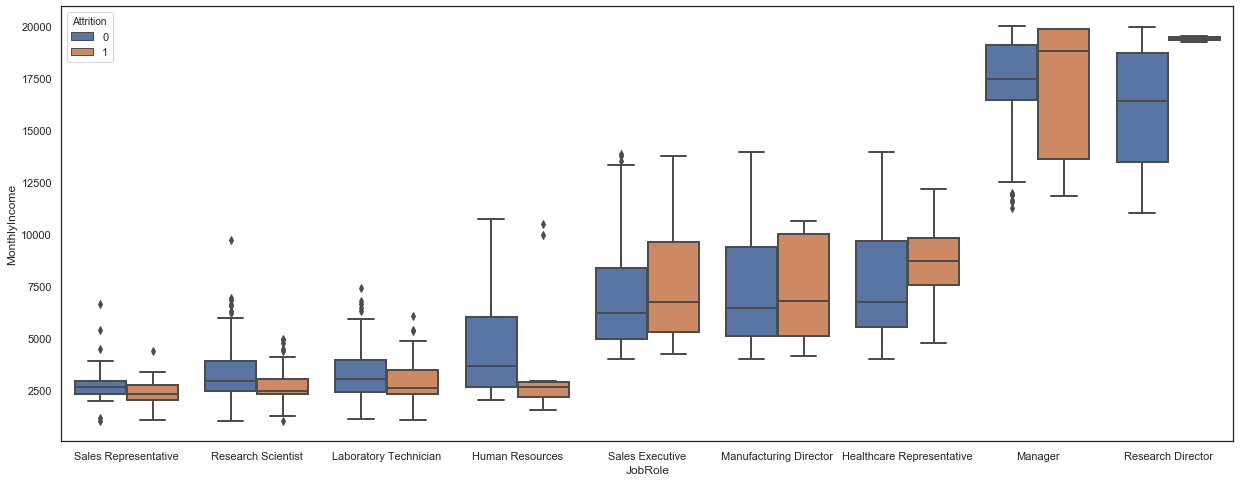

In [545]:
f, ax = plt.subplots(figsize=(21,8))
ax = sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, order=['Sales Representative', 'Research Scientist', 'Laboratory Technician', 'Human Resources',
                                                                                  'Sales Executive', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Research Director'], linewidth=2)

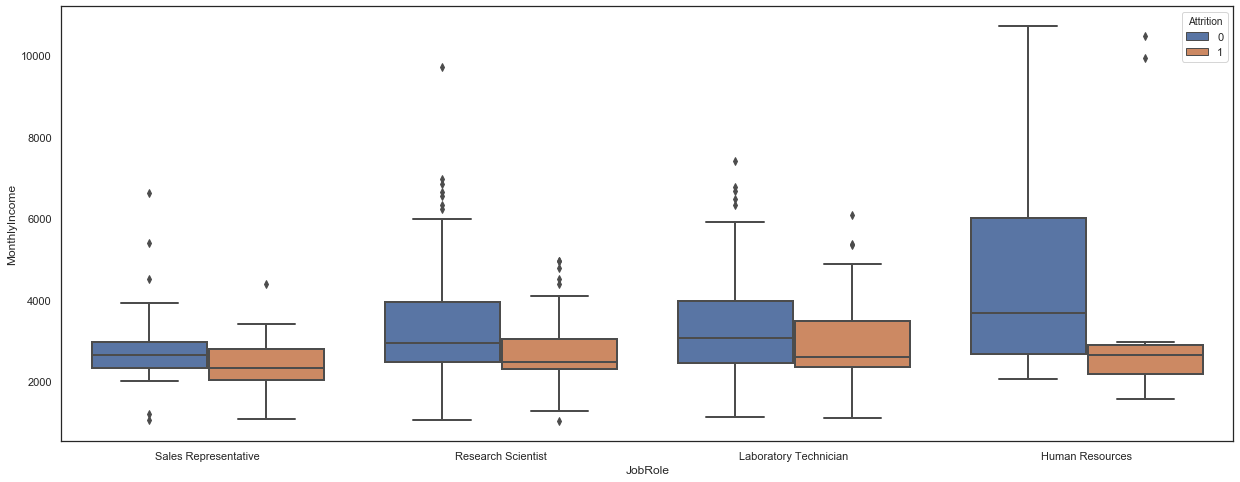

In [325]:
# Low Income: Sales Representative, Research Scientist, Laboratory Technician, Human Resources

f, ax = plt.subplots(figsize=(21,8))
ax = sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, order=['Sales Representative', 'Research Scientist', 'Laboratory Technician', 'Human Resources'], linewidth=2)

In [ ]:
# Let's evaluate the correlation between variable just using role with low income

In [343]:
df_low = df[(df['JobRole'] == 'Sales Representative') | (df['JobRole'] == 'Research Scientist') | (df['JobRole'] == 'Laboratory Technician') | (df['JobRole'] == 'Human Resources')].copy()

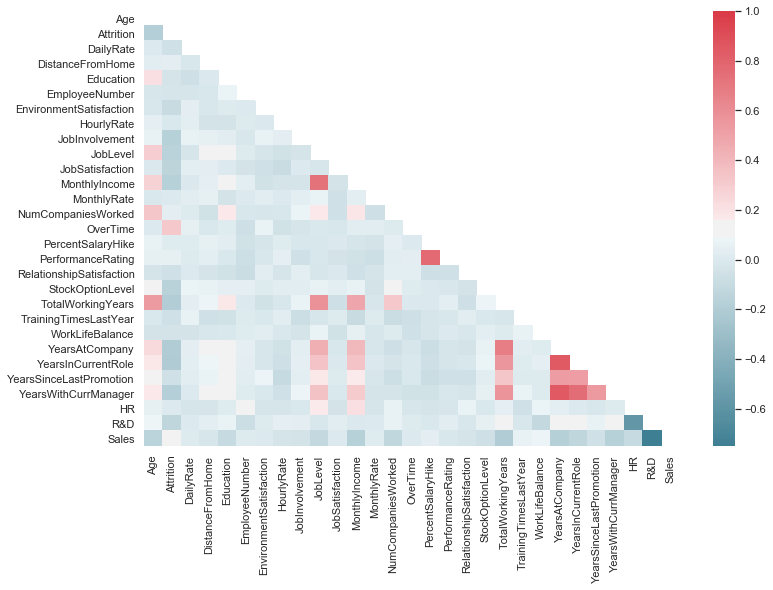

In [344]:
# Correlation between variables

sns.set(style="white")

corr = df_low.corr()
corr.drop(['EmployeeCount', 'StandardHours'], axis=0, inplace=True)
corr.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

In [345]:
# Attrition Correlation with all values (sorted)
corr[['Attrition']].sort_values('Attrition', ascending=False)

,Attrition
Attrition,1.000000
OverTime,0.317078
Sales,0.153917
PerformanceRating,0.050522
DistanceFromHome,0.040861
NumCompaniesWorked,0.038770
PercentSalaryHike,0.022501
MonthlyRate,0.006192
HR,0.004310
HourlyRate,-0.006488


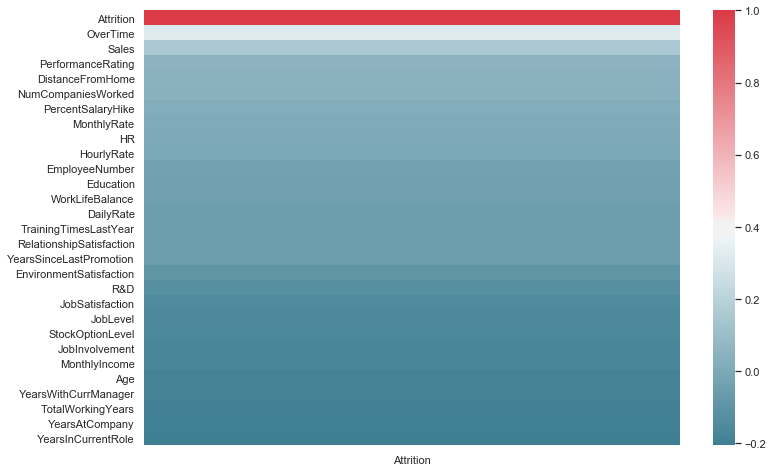

In [346]:
# Plotting only Attrition corr
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = corr[['Attrition']].sort_values('Attrition', ascending=False)

f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, cmap=cmap)

In [ ]:
# It change, but not in oposite ways

In [542]:
df[df['Attrition'] == 1]['JobRole'].value_counts()

Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: JobRole, dtype: int64

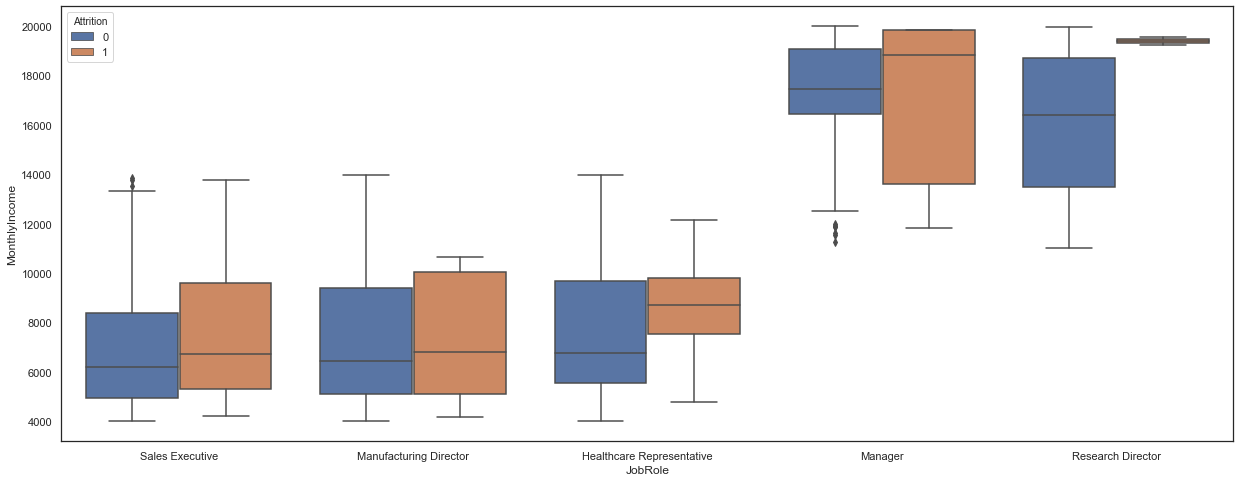

In [538]:
# Medium Income: Sales Executive, Manufacturin DIrector, Healthcare Representative

f, ax = plt.subplots(figsize=(21,8))
ax = sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, order=['Sales Executive', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Research Director'])

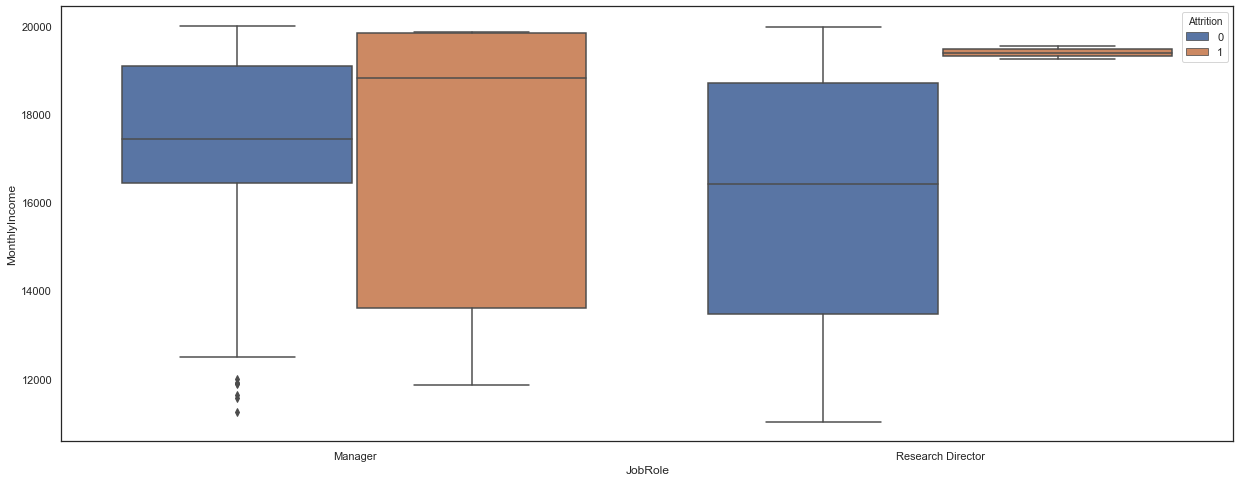

In [226]:
# High Income: Manager, Research Director

f, ax = plt.subplots(figsize=(21,8))
ax = sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, order=['Manager', 'Research Director'])

In [885]:
# There is a difference between low, medium and high salaries
# Probably they were motivate by different reasons 

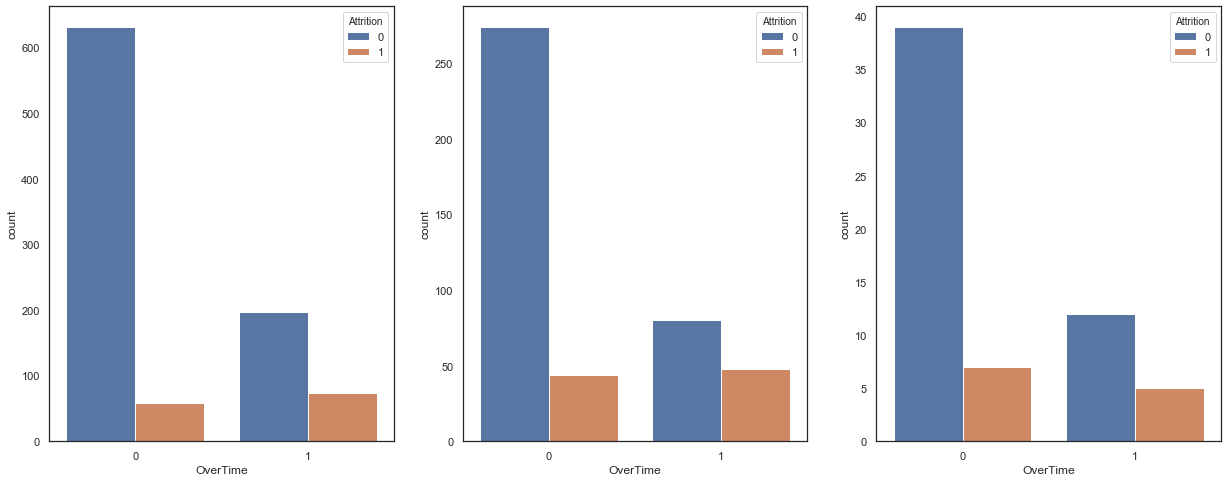

In [177]:
# OverTime and Attrition per Department

f, ax = plt.subplots(1, 3, figsize=(21,8))
sns.countplot(x='OverTime', hue='Attrition', data=df[df['Department'] == 'R&D'], ax=ax[0])
sns.countplot(x='OverTime', hue='Attrition', data=df[df['Department'] == 'Sales'], ax=ax[1])
sns.countplot(x='OverTime', hue='Attrition', data=df[df['Department'] == 'HR'], ax=ax[2])


In [178]:
# For Research & Development Department

In [179]:
df[df['Department'] == 'R&D']['JobRole'].value_counts()

Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Research Director             80
Manager                       54
Name: JobRole, dtype: int64

In [181]:
# For Sales Department

In [182]:
df[df['Department'] == 'Sales']['JobRole'].value_counts()

Sales Executive         326
Sales Representative     83
Manager                  37
Name: JobRole, dtype: int64

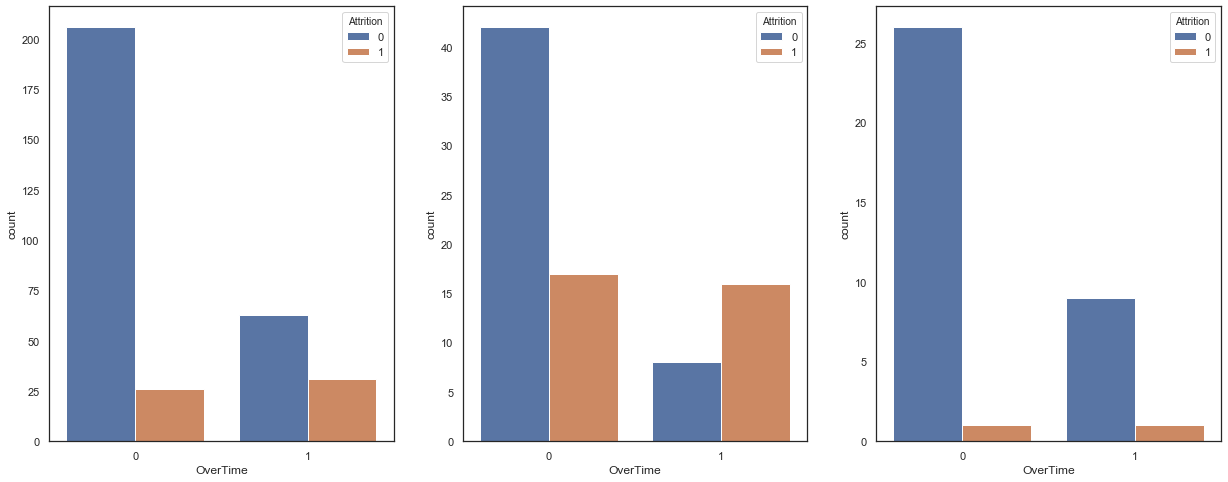

In [183]:
f, ax = plt.subplots(1, 3, figsize=(21,8))
sns.countplot(x='OverTime', hue='Attrition', data=df[(df['Department'] == 'Sales') & (df['JobRole'] == 'Sales Executive')], ax=ax[0])
sns.countplot(x='OverTime', hue='Attrition', data=df[(df['Department'] == 'Sales') & (df['JobRole'] == 'Sales Representative')], ax=ax[1])
sns.countplot(x='OverTime', hue='Attrition', data=df[(df['Department'] == 'Sales') & (df['JobRole'] == 'Manager')], ax=ax[2])

In [ ]:
# For HR Department

In [ ]:
df[df['Department'] == 'HR']['JobRole'].value_counts()

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(21,8))
sns.countplot(x='OverTime', hue='Attrition', data=df[(df['Department'] == 'HR') & (df['JobRole'] == 'Human Resources')], ax=ax[0])
sns.countplot(x='OverTime', hue='Attrition', data=df[(df['Department'] == 'HR') & (df['JobRole'] == 'Manager')], ax=ax[1])

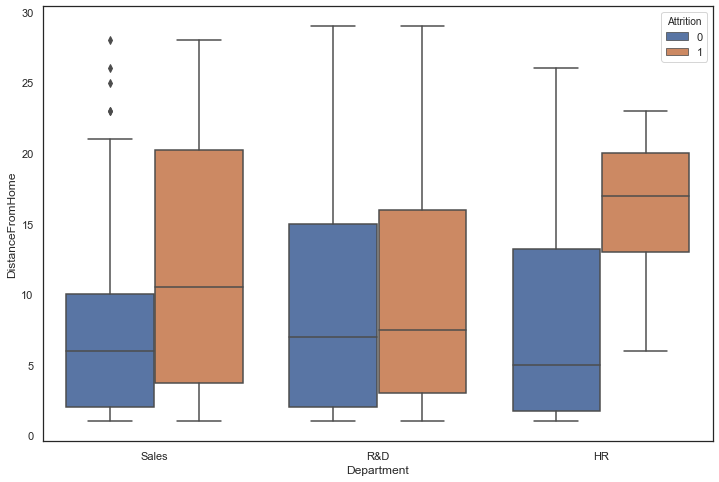

In [670]:
# Distance
f, ax = plt.subplots(figsize=(12,8))
_ = sns.boxplot(y='DistanceFromHome', x='Department', hue='Attrition', data=df[df['OverTime'] == 1])

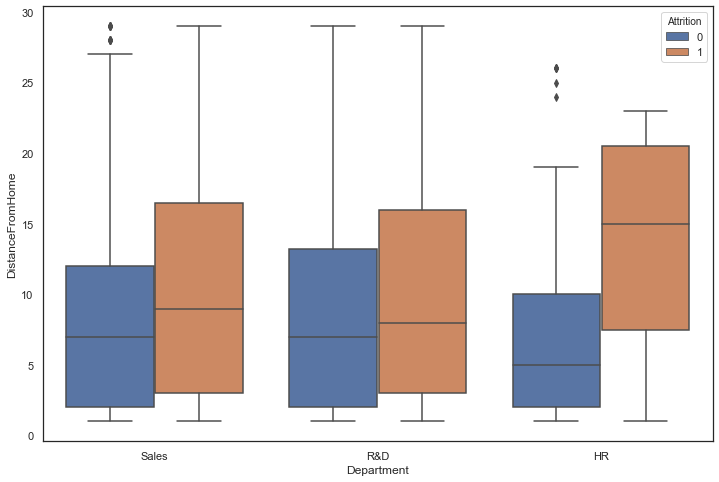

In [665]:
# Distance
f, ax = plt.subplots(figsize=(12,8))
_ = sns.boxplot(y='DistanceFromHome', x='Department', hue='Attrition', data=df)

In [615]:
# Attrition Ratio Per Department
attrition_per_department = df.groupby(['Department'])[['Attrition', 'EmployeeCount']].sum().copy()
attrition_per_department['ratio'] = attrition_per_department['Attrition']/attrition_per_department['EmployeeCount']
attrition_per_department.sort_values(by='EmployeeCount', ascending=False, inplace=True)
attrition_per_department

,Attrition,EmployeeCount,ratio
Department,,,
R&D,133,961,0.138398
Sales,92,446,0.206278
HR,12,63,0.190476


In [616]:
# Average Revenue Per Department
avg_monthly_income = df.groupby(['Department', 'Attrition'])[['MonthlyIncome']].mean().copy()
avg_monthly_income.reset_index(inplace=True)
avg_monthly_income

,Department,Attrition,MonthlyIncome
0,HR,0,7345.980392
1,HR,1,3715.750000
2,R&D,0,6630.326087
3,R&D,1,4108.075188
4,Sales,0,7232.240113
5,Sales,1,5908.456522


In [617]:
# Median Revenue Per Department
median_monthly_income = df.groupby(['Department', 'Attrition'])[['MonthlyIncome']].median().copy()
median_monthly_income.reset_index(inplace=True)
median_monthly_income

,Department,Attrition,MonthlyIncome
0,HR,0,4936.0
1,HR,1,2652.5
2,R&D,0,4708.0
3,R&D,1,2759.0
4,Sales,0,6073.5
5,Sales,1,5314.0


In [618]:
# Average Years At COmpany Per Department
avg_years_company_per_department = df.groupby(['Department', 'Attrition'])[['YearsAtCompany']].mean()
avg_years_company_per_department.reset_index(inplace=True)
avg_years_company_per_department

,Department,Attrition,YearsAtCompany
0,HR,0,7.960784
1,HR,1,4.166667
2,R&D,0,7.171498
3,R&D,1,4.954887
4,Sales,0,7.745763
5,Sales,1,5.510870


In [619]:
# Median Years At COmpany Per Department
median_years_company_per_department = df.groupby(['Department', 'Attrition'])[['YearsAtCompany']].median()
median_years_company_per_department.reset_index(inplace=True)
median_years_company_per_department

,Department,Attrition,YearsAtCompany
0,HR,0,5.0
1,HR,1,2.5
2,R&D,0,5.0
3,R&D,1,3.0
4,Sales,0,7.0
5,Sales,1,3.5


In [620]:
median_monthly_income

,Department,Attrition,MonthlyIncome
0,HR,0,4936.0
1,HR,1,2652.5
2,R&D,0,4708.0
3,R&D,1,2759.0
4,Sales,0,6073.5
5,Sales,1,5314.0


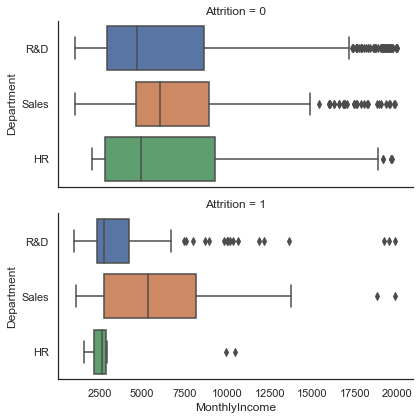

In [621]:
_ = sns.catplot(x='MonthlyIncome', y='Department', row='Attrition', kind='box', orient='h', height=3, aspect=2, data=df, order=df['Department'].value_counts().index)

In [622]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [682]:
df[df['Attrition'] == 0][['MonthlyIncome']].to_clipboard()

In [703]:
df[(df['Attrition'] == 1) & (df['JobRole'] == 'Research Director')][['JobRole', 'MonthlyIncome']].to_clipboard()

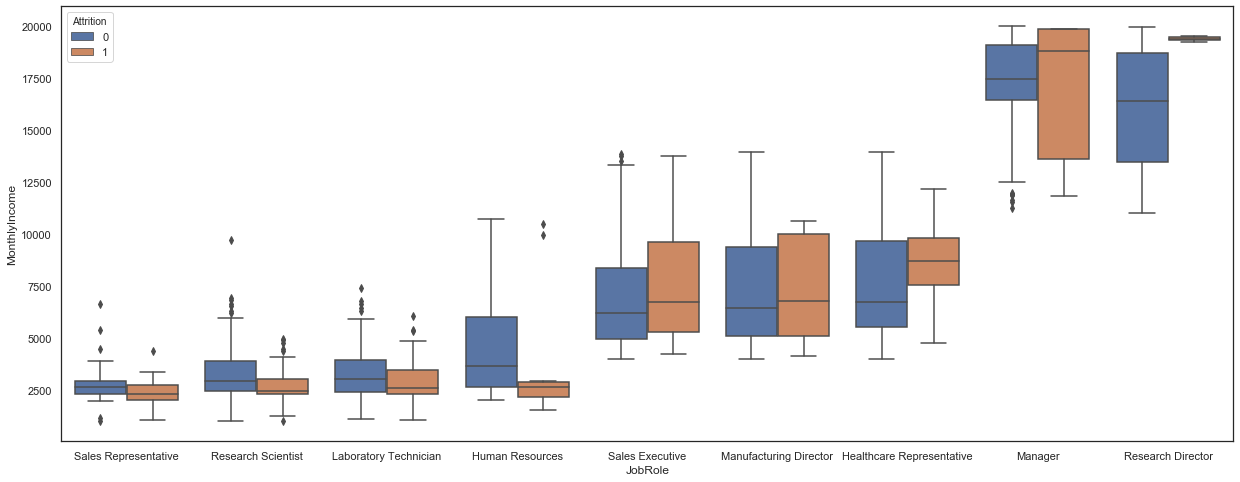

In [623]:
f, ax = plt.subplots(figsize=(21,8))
ax = sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, order=['Sales Representative', 'Research Scientist', 'Laboratory Technician', 'Human Resources', 'Sales Executive',
                                                                                  'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Research Director'])

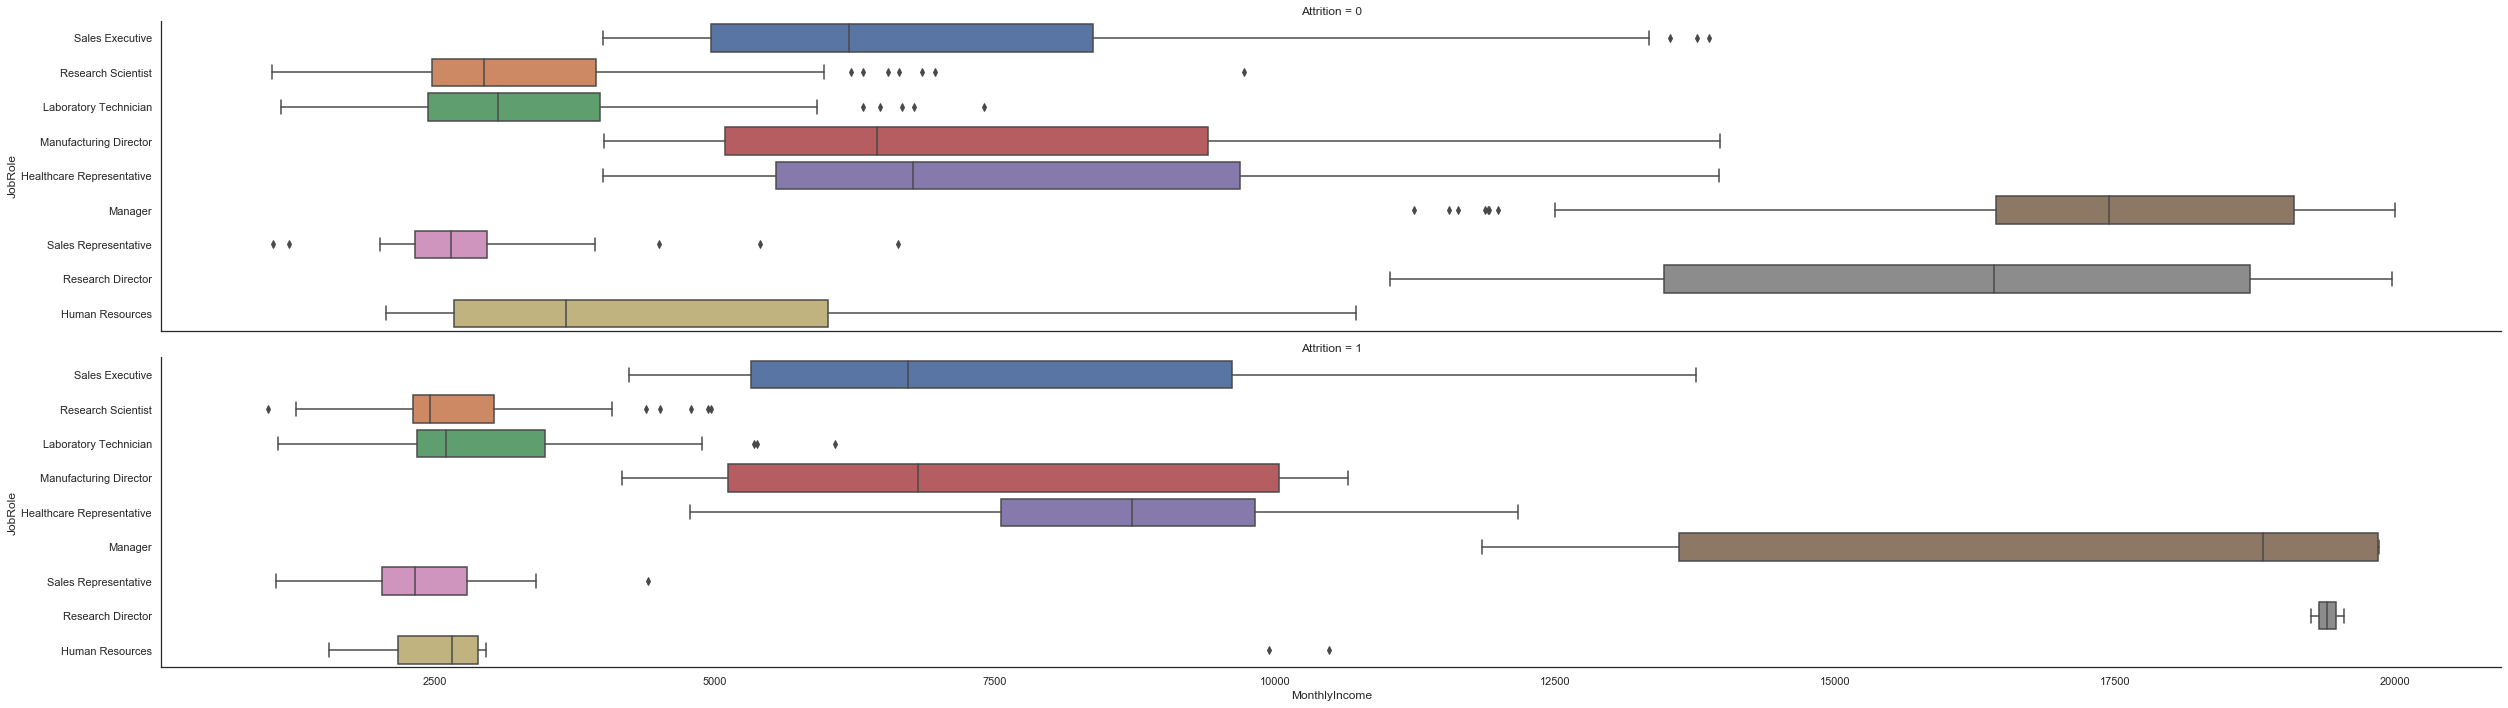

In [624]:
_ = sns.catplot(x='MonthlyIncome', y='JobRole', row='Attrition', kind='box', orient='h', height=5, aspect=7, data=df, order=df['JobRole'].value_counts().index)

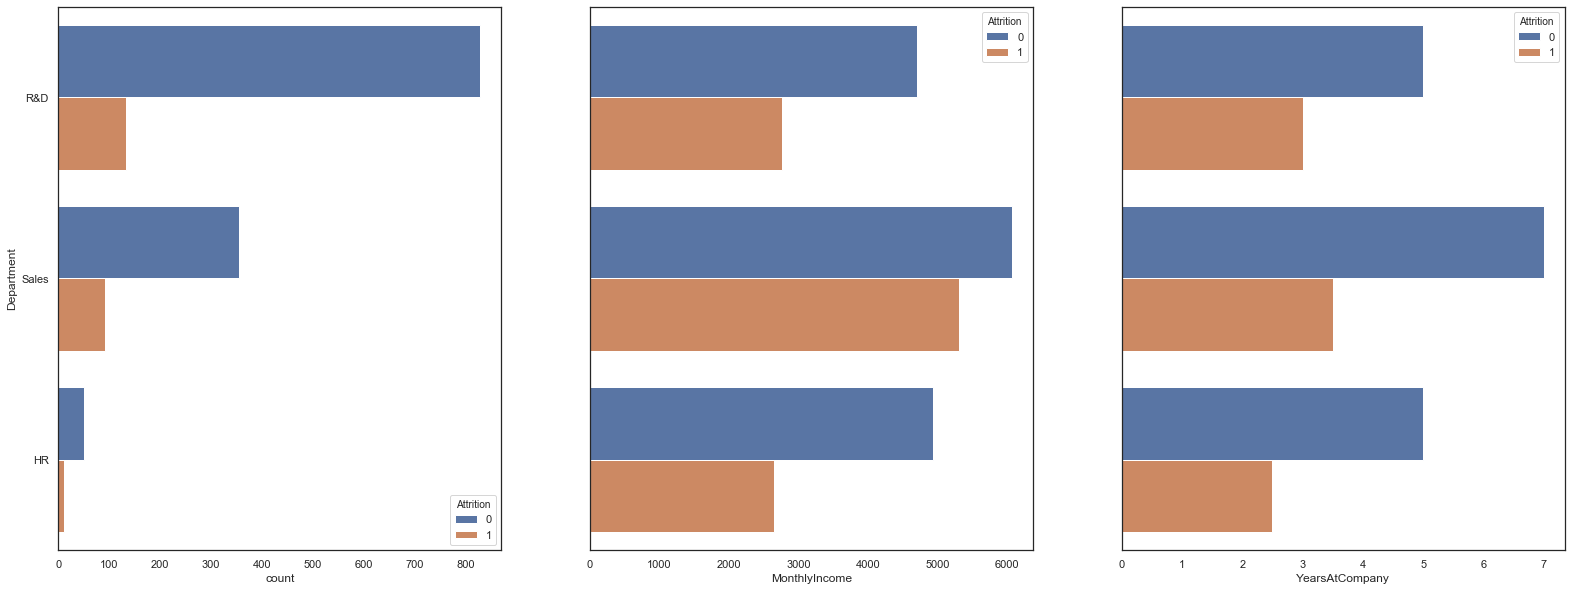

In [625]:
fig, ax = plt.subplots(1,3, figsize=(27,10))
_ = sns.countplot(y='Department', data=df, hue='Attrition', order=df['Department'].value_counts().index, ax=ax[0])
_ = sns.barplot(y='Department', x='MonthlyIncome', data=median_monthly_income, hue='Attrition', order=df['Department'].value_counts().index, ax=ax[1])
_ = sns.barplot(y='Department', x='YearsAtCompany', data=median_years_company_per_department, hue='Attrition', order=df['Department'].value_counts().index, ax=ax[2])


for ax in ax.flat:
    ax.label_outer()

In [626]:
# Per Job Role
attrition_per_role = df.groupby(['Department', 'JobRole'])[['Attrition', 'EmployeeCount']].sum().copy()
attrition_per_role['ratio'] = attrition_per_role['Attrition']/attrition_per_role['EmployeeCount']
attrition_per_role.sort_values(by=['Department', 'ratio'], ascending=False, inplace=True)
attrition_per_role

Attrition  EmployeeCount     ratio
Department JobRole                                                      
Sales      Sales Representative              33             83  0.397590
           Sales Executive                   57            326  0.174847
           Manager                            2             37  0.054054
R&D        Laboratory Technician             62            259  0.239382
           Research Scientist                47            292  0.160959
           Manufacturing Director            10            145  0.068966
           Healthcare Representative          9            131  0.068702
           Manager                            3             54  0.055556
           Research Director                  2             80  0.025000
HR         Human Resources                   12             52  0.230769
           Manager                            0             11  0.000000

In [631]:
avg_monthly_income_role = df.groupby(['Department', 'JobRole', 'Attrition'])[['MonthlyIncome']].mean().copy()
avg_monthly_income_role.sort_values(by=['Department', 'JobRole', 'Attrition', 'MonthlyIncome'], ascending=False, inplace=True)
avg_monthly_income_role.reset_index(inplace=True)
avg_monthly_income_role



,Department,JobRole,Attrition,MonthlyIncome
0,Sales,Sales Representative,1,2364.727273
1,Sales,Sales Representative,0,2798.440000
2,Sales,Sales Executive,1,7489.000000
3,Sales,Sales Executive,0,6804.617100
4,Sales,Manager,1,19334.500000
5,Sales,Manager,0,16852.828571
6,R&D,Research Scientist,1,2780.468085
7,R&D,Research Scientist,0,3328.122449
8,R&D,Research Director,1,19395.500000
9,R&D,Research Director,0,15947.346154


In [632]:
years_company_per_role = df.groupby(['Department', 'JobRole', 'Attrition'])[['YearsAtCompany']].mean()
years_company_per_role.reset_index(inplace=True)
years_company_per_role

,Department,JobRole,Attrition,YearsAtCompany
0,HR,Human Resources,0,5.675000
1,HR,Human Resources,1,4.166667
2,HR,Manager,0,16.272727
3,R&D,Healthcare Representative,0,8.188525
4,R&D,Healthcare Representative,1,10.888889
5,R&D,Laboratory Technician,0,5.604061
6,R&D,Laboratory Technician,1,3.161290
7,R&D,Manager,0,13.882353
8,R&D,Manager,1,7.333333
9,R&D,Manufacturing Director,0,7.518519


In [633]:
years_company_per_role

,Department,JobRole,Attrition,YearsAtCompany
0,HR,Human Resources,0,5.675000
1,HR,Human Resources,1,4.166667
2,HR,Manager,0,16.272727
3,R&D,Healthcare Representative,0,8.188525
4,R&D,Healthcare Representative,1,10.888889
5,R&D,Laboratory Technician,0,5.604061
6,R&D,Laboratory Technician,1,3.161290
7,R&D,Manager,0,13.882353
8,R&D,Manager,1,7.333333
9,R&D,Manufacturing Director,0,7.518519


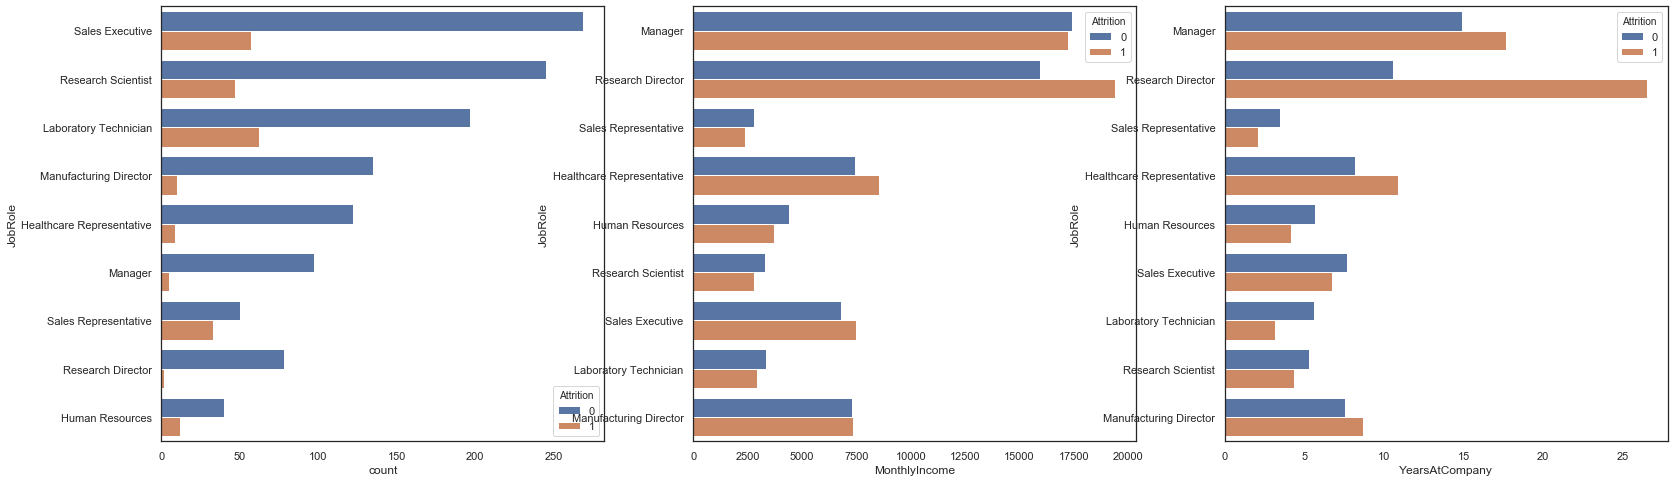

In [630]:
# Per Job Role
fig, ax = plt.subplots(1,3, figsize=(27,8))

_ = sns.countplot(y='JobRole', data=df, hue='Attrition', order=df['JobRole'].value_counts().index, ax=ax[0])
_ = sns.barplot(y='JobRole', x='MonthlyIncome', data=avg_monthly_income_role, hue='Attrition', order=avg_monthly_income_role['JobRole'].value_counts().index, ci=None, ax=ax[1])
_ = sns.barplot(y='JobRole', x='YearsAtCompany', data=years_company_per_role, hue='Attrition', order=years_company_per_role['JobRole'].value_counts().index, ci=None, ax=ax[2])


#for ax in ax.flat:
 #   ax.label_outer()

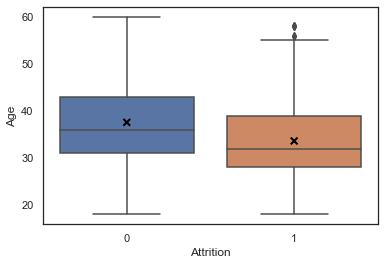

In [634]:
average_age = df.groupby(['Attrition'])[['Age']].mean().reset_index().copy()

sns.boxplot(x='Attrition', y='Age', data=df)
sns.pointplot(x='Attrition', y='Age', data=average_age, markers='x', color='black', linestyles='')

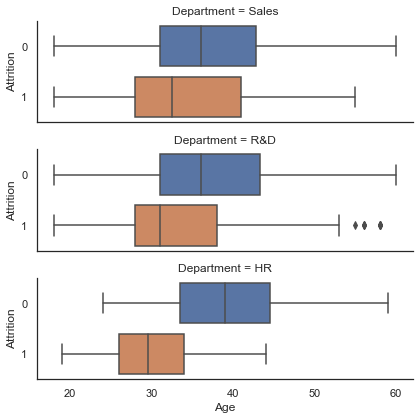

In [635]:
# Relation between Age and Department with Attrition

_ = sns.catplot(x='Age', y='Attrition', row='Department', kind='box', orient='h', height=2, aspect=3, data=df)

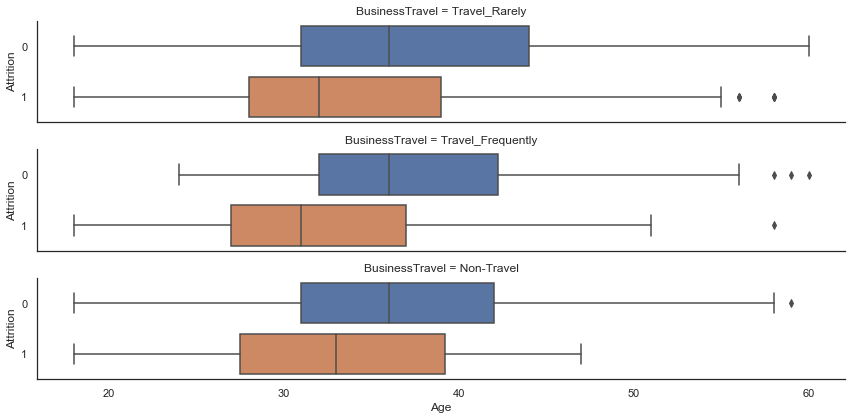

In [636]:
_ = sns.catplot(x='Age', y='Attrition', row='BusinessTravel', kind='box', orient='h', height=2, aspect=6, data=df)

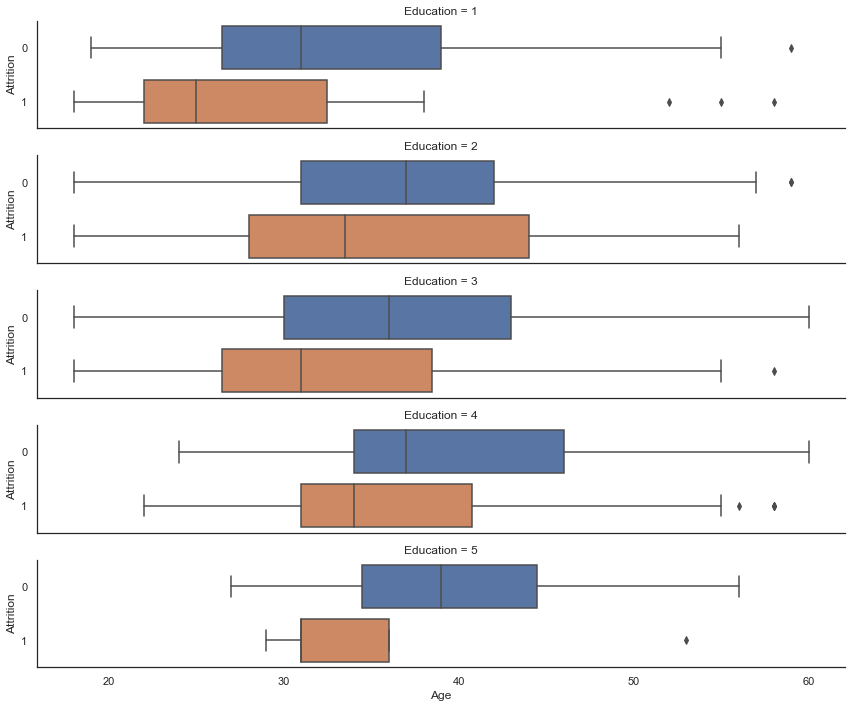

In [637]:
_ = sns.catplot(x='Age', y='Attrition', row='Education', kind='box', orient='h', height=2, aspect=6, data=df)

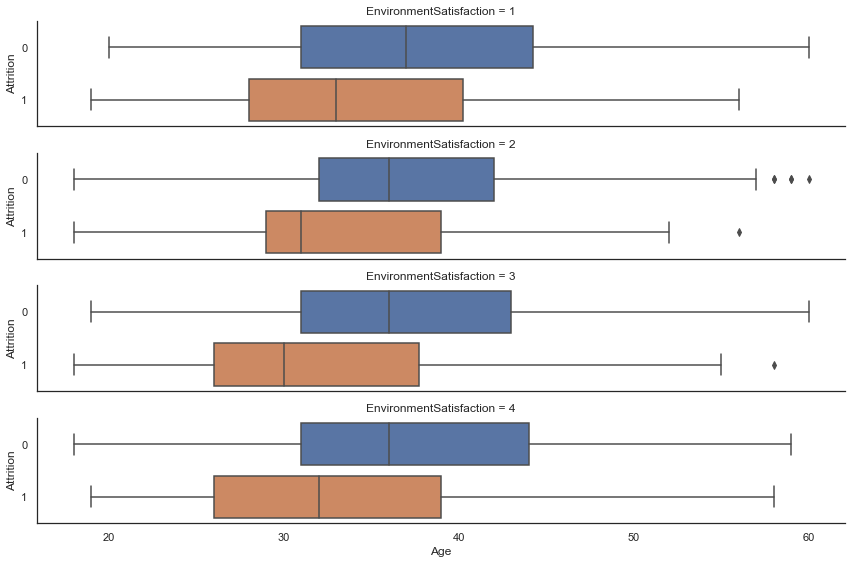

In [638]:
_ = sns.catplot(x='Age', y='Attrition', row='EnvironmentSatisfaction', kind='box', orient='h', height=2, aspect=6, data=df)

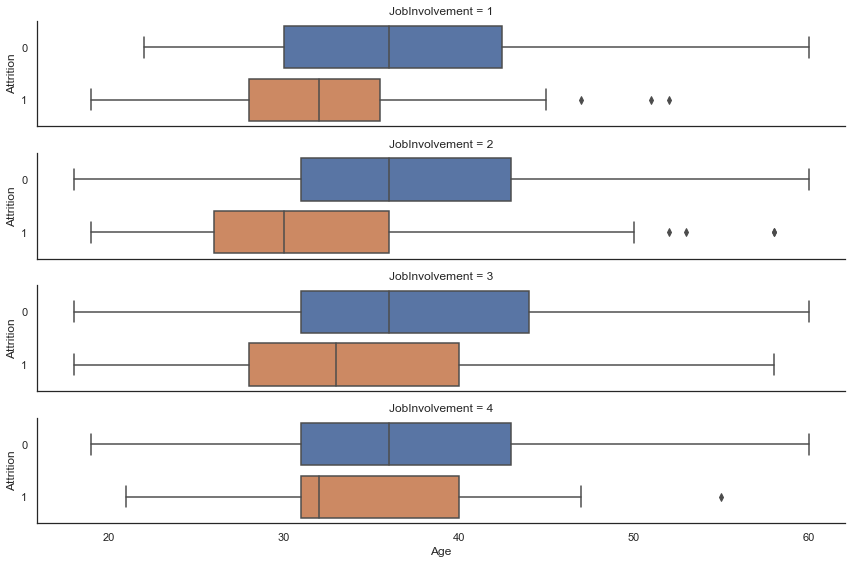

In [639]:
_ = sns.catplot(x='Age', y='Attrition', row='JobInvolvement', kind='box', orient='h', height=2, aspect=6, data=df)

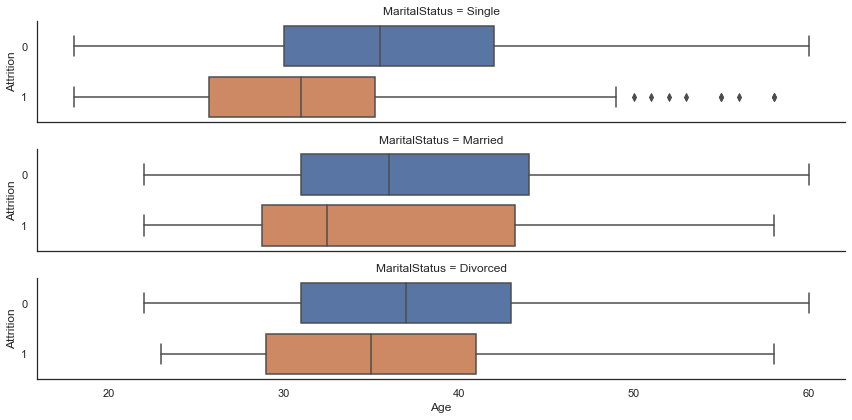

In [640]:
_ = sns.catplot(x='Age', y='Attrition', row='MaritalStatus', kind='box', orient='h', height=2, aspect=6, data=df)

In [641]:
df.groupby(['MaritalStatus', 'Attrition'])[['EmployeeCount']].count()

EmployeeCount
MaritalStatus Attrition               
Divorced      0                    294
              1                     33
Married       0                    589
              1                     84
Single        0                    350
              1                    120

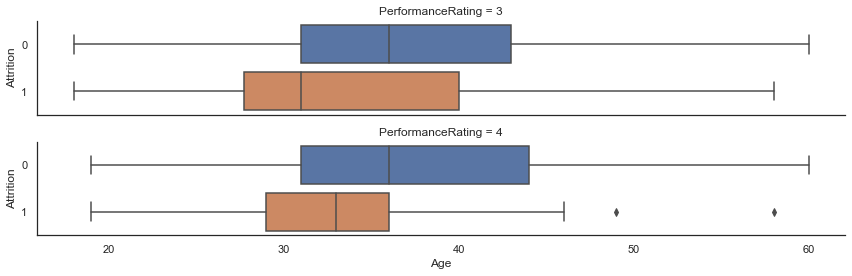

In [642]:
_ = sns.catplot(x='Age', y='Attrition', row='PerformanceRating', kind='box', orient='h', height=2, aspect=6, data=df)

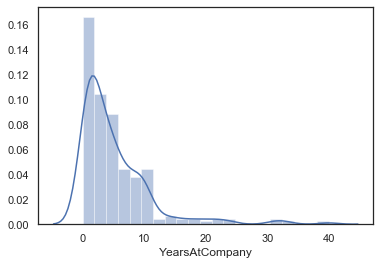

In [643]:
sns.distplot(df[df['Attrition'] == 1 ]['YearsAtCompany'])

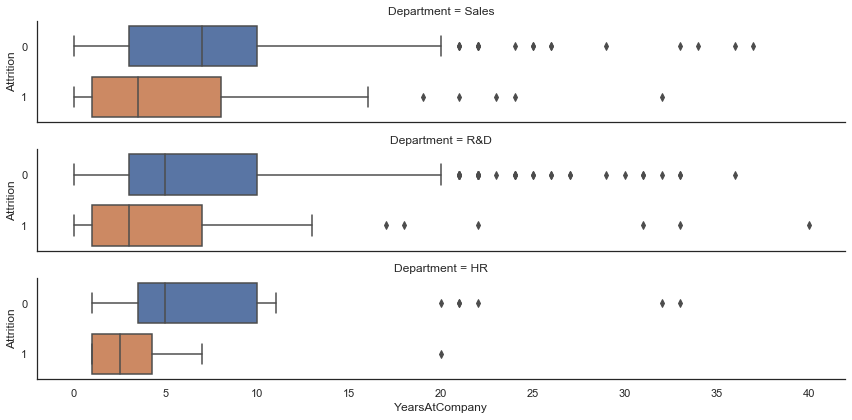

In [644]:
_ = sns.catplot(x='YearsAtCompany', y='Attrition', row='Department', kind='box', orient='h', height=2, aspect=6, data=df)

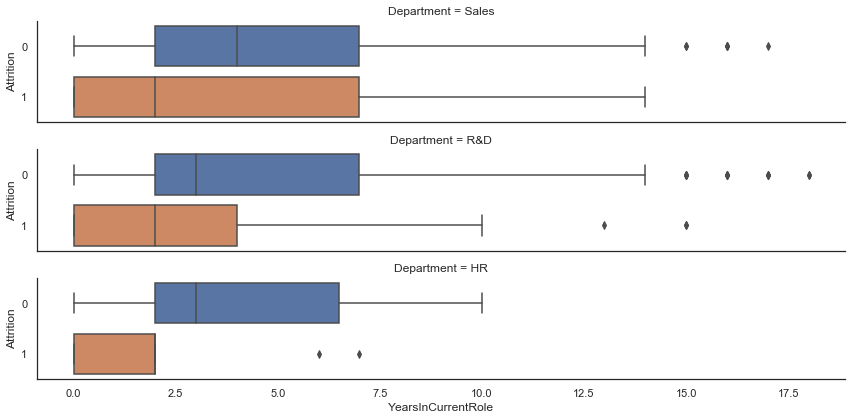

In [645]:
_ = sns.catplot(x='YearsInCurrentRole', y='Attrition', row='Department', kind='box', orient='h', height=2, aspect=6, data=df)

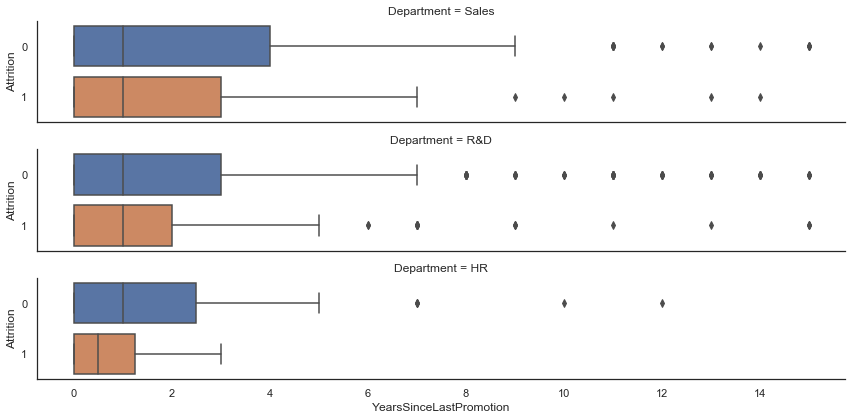

In [646]:
_ = sns.catplot(x='YearsSinceLastPromotion', y='Attrition', row='Department', kind='box', orient='h', height=2, aspect=6, data=df)

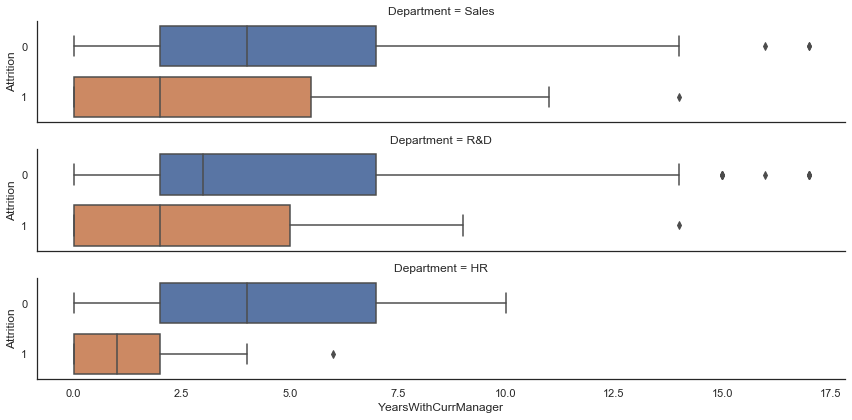

In [647]:
_ = sns.catplot(x='YearsWithCurrManager', y='Attrition', row='Department', kind='box', orient='h', height=2, aspect=6, data=df)

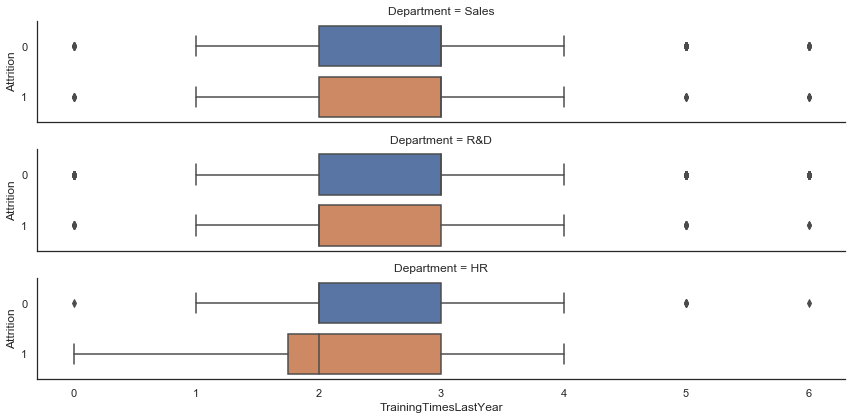

In [648]:
_ = sns.catplot(x='TrainingTimesLastYear', y='Attrition', row='Department', kind='box', orient='h', height=2, aspect=6, data=df)

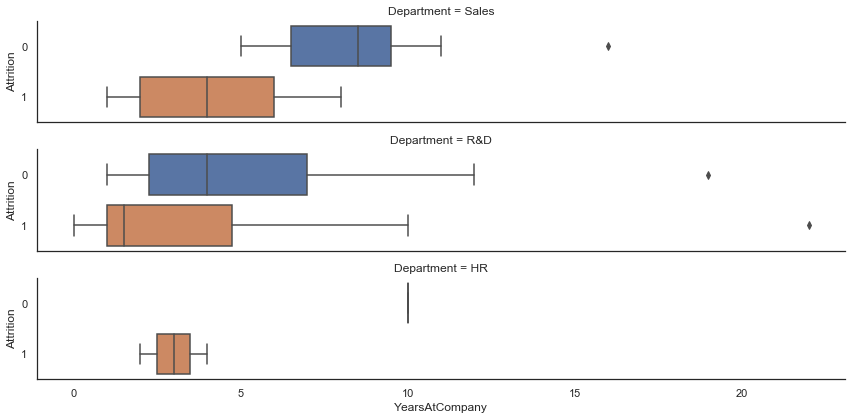

In [649]:
_ = sns.catplot(x='YearsAtCompany', y='Attrition', row='Department', kind='box', orient='h', height=2, aspect=6, data=df[df['TrainingTimesLastYear'] == 0])

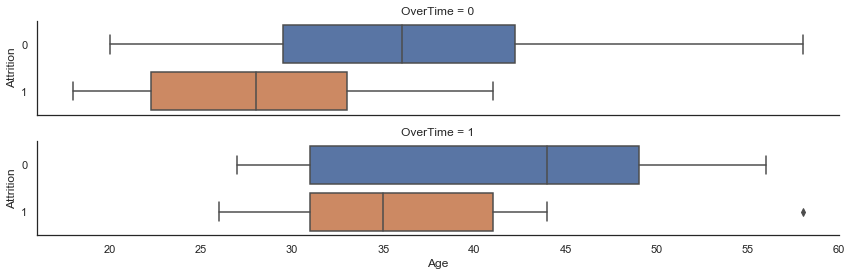

In [650]:
_ = sns.catplot(x='Age', y='Attrition', row='OverTime', kind='box', orient='h', height=2, aspect=6, data=df[df['TrainingTimesLastYear'] == 0])

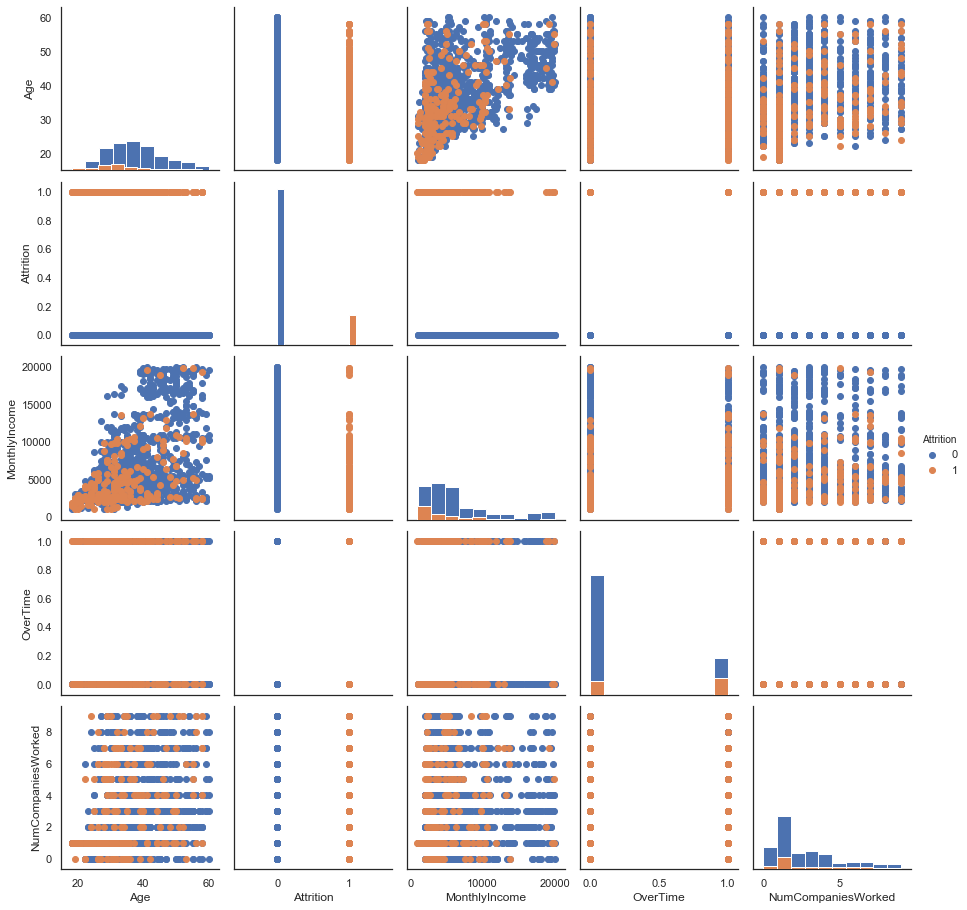

In [652]:
g = sns.PairGrid(df, hue='Attrition',  vars=['Age', 'Attrition', 'MonthlyIncome', 'OverTime', 'NumCompaniesWorked'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();


In [359]:
df_bkp = df.copy() 

## Machine Learning Models

#### Feature Engineering

In [1016]:
def feature_engineering_corr(df):
    
    # Transforming Attrition to binary
    df['Attrition'].replace('Yes', 0, inplace=True)
    df['Attrition'].replace('No', 1, inplace=True)
    
    # Tranforming BusinessTravel to numeric
    df['BusinessTravel'].replace('Non-Travel', 0, inplace=True)
    df['BusinessTravel'].replace('Travel_Rarely', 1, inplace=True)
    df['BusinessTravel'].replace('Travel_Frequently', 2, inplace=True)
    
    # Transforming Department to Dummie Variable
    df['Department'].replace('Sales', 'S', inplace=True)
    df['Department'].replace('Research & Development', 'R', inplace=True)
    df['Department'].replace('Human Resources', 'H', inplace=True)
    df = pd.get_dummies(data=df, columns=['Department'])
    
    # Tranwforming EducationField
    df['EducationField'].replace('Life Sciences', 'LS', inplace=True)
    df['EducationField'].replace('Other', 'O', inplace=True)
    df['EducationField'].replace('Medical', 'M', inplace=True)
    df['EducationField'].replace('Technical Degree', 'TD', inplace=True)
    df['EducationField'].replace('Human Resources', 'HR', inplace=True)
    df = pd.get_dummies(data=df, columns=['EducationField'])
    
    # Tranforming Gener
    df['Gender'].replace('Female', 1, inplace=True)
    df['Gender'].replace('Male', 0, inplace=True)
    
    # Transforming JobRole to dummie variable
    df['JobRole'].replace('Sales Executive', 'SE', inplace=True)
    df['JobRole'].replace('Research Scientist', 'RS', inplace=True)
    df['JobRole'].replace('Laboratory Technician', 'LT', inplace=True)
    df['JobRole'].replace('Manufacturing Director', 'MD', inplace=True)
    df['JobRole'].replace('Healthcare Representative', 'HC', inplace=True)
    df['JobRole'].replace('Manager', 'M', inplace=True)
    df['JobRole'].replace('Sales Representative', 'SR', inplace=True)
    df['JobRole'].replace('Research Director', 'RD', inplace=True)
    df['JobRole'].replace('Human Resources', 'HR', inplace=True)
    df = pd.get_dummies(data=df, columns=['JobRole'])
    
    # Transforming MaritalStatus to dummie variable
    df = pd.get_dummies(data=df, columns=['MaritalStatus'])
    
    # Transforming OverTime to binary
    df['OverTime'].replace('Yes', 1, inplace=True)
    df['OverTime'].replace('No', 0, inplace=True)
    
    
    df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
    
    df.reset_index(inplace=True, drop=True)
    
    return df

In [1017]:
# Reading Data Again
df = pd.read_excel('../data/HR.xlsx')
#  Applying Feture Engineering
df = feature_engineering_corr(df)

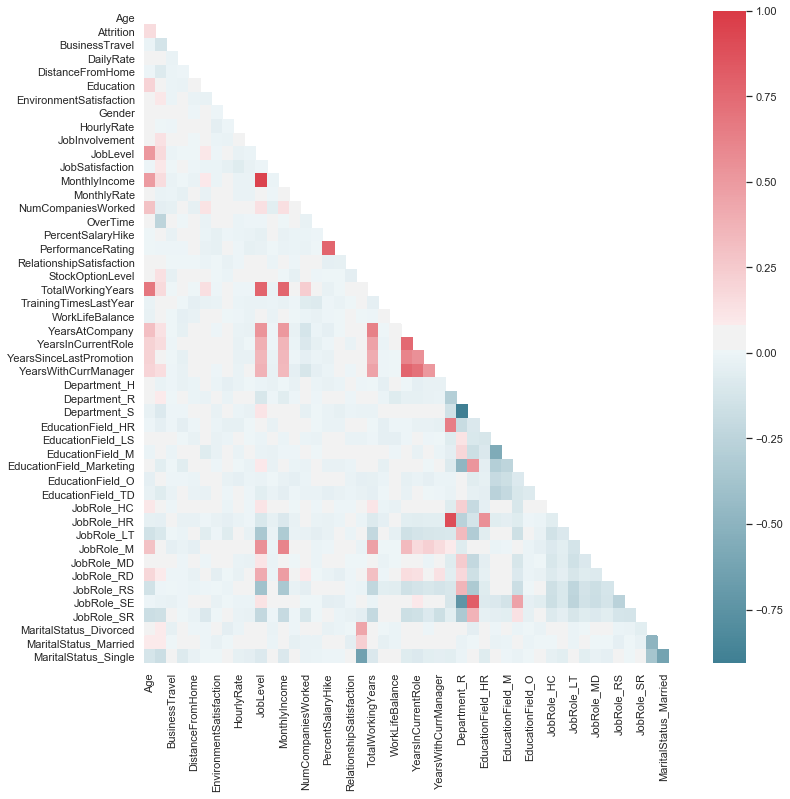

In [1018]:
# Correlation between variables (all converted to binary/numerical)
numerical_columns = df._get_numeric_data().columns.to_list()

sns.set(style="white")

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

### High correlation in JobLevel, MonthlyIncome and Total Working Years
### Maybe we should combine both to train

In [1019]:
# Importing Machine Learnig Libraries

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

from sklearn.preprocessing import StandardScaler, Normalizer

In [1020]:
y = df['Attrition']
x = df.drop('Attrition', axis=1)

In [1021]:
# declaring the seed for all operations
random_state = 42

In [1022]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=random_state ,stratify=y)
# Stratify will keep the ratio

In [1023]:
ytrain.value_counts()/len(ytrain)

1    0.838475
0    0.161525
Name: Attrition, dtype: float64

In [1024]:
ytest.value_counts()/len(ytest)

1    0.839674
0    0.160326
Name: Attrition, dtype: float64

In [1035]:
def eval(ytest, y_pred):
    a = precision_score(ytest, y_pred).round(4)
    r = recall_score(ytest, y_pred).round(4)
    
    return 'Accuracy: {0} - Recall: {1}'.format(a, r)

### Logistic Regression

##### First General Attempt

In [1036]:
lr = LogisticRegression(max_iter=5000, random_state=random_state)
lr = lr.fit(xtrain, ytrain)

In [1037]:
y_pred = lr.predict(xtest)

In [1038]:
eval(ytest, y_pred)

'Accuracy: 0.8935 - Recall: 0.9773'

In [1039]:
confusion_matrix(ytest, y_pred)

array([[ 23,  36],
       [  7, 302]], dtype=int64)

### Decision Tree

##### First General Attempt

In [1040]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1041]:
y_pred = dt.predict(xtest)

In [1042]:
eval(ytest, y_pred)

'Accuracy: 0.8864 - Recall: 0.8835'

In [1043]:
confusion_matrix(ytest, y_pred)

array([[ 24,  35],
       [ 36, 273]], dtype=int64)

In [1044]:
# Not good results, let's try to hyperparameter tunning
# Let's use GridSearchCV from skleanr to exhaustive search over specified parameter values for an estimator.

In [1045]:
# Parameters ranges
max_depth = [*range(1,31)]
min_samples_split = [*range(2,11)]
min_samples_leaf = [*range(1,31)]

In [1046]:
parameters = { 'criterion' : ('gini', 'entropy'), 'splitter' : ('best', 'random'), 'max_depth' : max_depth, 
              'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}


dt = DecisionTreeClassifier(random_state=42)
dt_cv = RandomizedSearchCV(dt, parameters, scoring='accuracy', n_jobs=-1, verbose=1)

In [1047]:
dt_cv.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
         

In [1048]:
dt = dt_cv.best_estimator_.fit(xtrain, ytrain)

In [1049]:
y_pred = dt.predict(xtest)

In [1050]:
eval(ytest, y_pred)

'Accuracy: 0.8827 - Recall: 0.9256'

In [1051]:
confusion_matrix(ytest, y_pred)

array([[ 21,  38],
       [ 23, 286]], dtype=int64)

### Random Forest

##### First General Attempt

In [1053]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1054]:
y_pred = rf.predict(xtest)

In [1055]:
eval(ytest, y_pred)

'Accuracy: 0.8722 - Recall: 0.9935'

In [1056]:
confusion_matrix(ytest, y_pred)

array([[ 14,  45],
       [  2, 307]], dtype=int64)

In [1057]:
# Hyperparameters Tunning

In [1058]:
# Parameters range
n_estimators = [*range(200, 3100, 100)]
criterion = ('gini', 'entropy')
max_depth = [None, *range(10, 200, 10)]
min_samples_split = [*range(2,11)]
min_samples_leaf = [*range(1,31)]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]

In [1062]:
parameters = {'n_estimators': n_estimators, 'criterion' : criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'max_features': max_features, 'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state=42)

rf = RandomizedSearchCV(estimator=rand_forest, param_distributions=parameters, scoring='accuracy', n_iter=125, verbose=1, n_jobs=-1)

In [1063]:
rf.fit(xtrain,ytrain)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed: 28.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=10,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [1064]:
y_pred = rf.best_estimator_.predict(xtest)

In [1065]:
eval(ytest, y_pred)

'Accuracy: 0.8718 - Recall: 0.9903'

In [1066]:
confusion_matrix(ytest, y_pred)

array([[ 14,  45],
       [  3, 306]], dtype=int64)